タコ (Tako)
===
Tako is a image processing workflow engine for high-performance computing

In [31]:
import sys
sys.path.append("/Users/DOE6903584/NERSC/tako")
sys.path.append("/Users/DOE6903584/NERSC/tako/tako/util")

In [32]:
from tako.arms.correction import Correction
from tako.head import head
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [33]:
alignment = Correction(setup={"algorithm": "ijmacro",
                   "data": "/Users/DOE6903584/NERSC/tako/examples/data/myxo-small.tif",
                   "output":"/Users/DOE6903584/NERSC/tako/examples/demo/myxo-small_align.tif",
                   "params": {'macro': "/Users/DOE6903584/NERSC/tako/bin/correction/alignment.ijm"}
                   }
                      )

INFO:tigres:tg_ntype=program tg_program_name=Tigres5536a6b0 message="registering identifier 'InputValues_4857804328' for InputValues with name 'InputValues_4857804328' " tg_program_id=fbf20fca-372b-4def-a70e-fd0052542744 tg_name=Tigres5536a6b0 event=register
INFO:tigres:tg_ntype=program tg_program_name=Tigres5536a6b0 message="registering identifier 'ijmacro-3' for Task with name 'ijmacro' " tg_program_id=fbf20fca-372b-4def-a70e-fd0052542744 tg_name=Tigres5536a6b0 event=register


In [34]:
segmentation = Correction(setup={"algorithm": "ijmacro",
                   "data": alignment.output,
                   "output":"/Users/DOE6903584/NERSC/tako/examples/demo/myxo-small_seg.tif",
                   "params": {'macro': "/Users/DOE6903584/NERSC/tako/bin/segmentation/segmentation.ijm"}
                   }
                      )

INFO:tigres:tg_ntype=program tg_program_name=Tigres5536a6b0 message="registering identifier 'InputValues_4859110248' for InputValues with name 'InputValues_4859110248' " tg_program_id=fbf20fca-372b-4def-a70e-fd0052542744 tg_name=Tigres5536a6b0 event=register
INFO:tigres:tg_ntype=program tg_program_name=Tigres5536a6b0 message="registering identifier 'ijmacro-4' for Task with name 'ijmacro' " tg_program_id=fbf20fca-372b-4def-a70e-fd0052542744 tg_name=Tigres5536a6b0 event=register


In [35]:
visualization = Correction(setup={"algorithm": "ijmacro",
                   "data": segmentation.output,
                   "output":"/Users/DOE6903584/NERSC/tako/examples/demo/myxo-small_vis.tif",
                   "params": {'macro': "/Users/DOE6903584/NERSC/tako/bin/visualization/visualization.ijm"}
                   }
                      )

INFO:tigres:tg_ntype=program tg_program_name=Tigres5536a6b0 message="registering identifier 'InputValues_4859109632' for InputValues with name 'InputValues_4859109632' " tg_program_id=fbf20fca-372b-4def-a70e-fd0052542744 tg_name=Tigres5536a6b0 event=register
INFO:tigres:tg_ntype=program tg_program_name=Tigres5536a6b0 message="registering identifier 'ijmacro-5' for Task with name 'ijmacro' " tg_program_id=fbf20fca-372b-4def-a70e-fd0052542744 tg_name=Tigres5536a6b0 event=register


In [36]:
do = head.do_workflow(setup=[alignment, segmentation, visualization])

INFO:tigres:tg_ntype=program tg_program_name=Tigres5536a6b0 message="registering identifier 'TaskArray_4859571464' for TaskArray with name 'TaskArray_4859571464' " tg_program_id=fbf20fca-372b-4def-a70e-fd0052542744 tg_name=Tigres5536a6b0 event=register
INFO:tigres:tg_ntype=program tg_program_name=Tigres5536a6b0 message="registering identifier 'InputArray_4765583152' for InputArray with name 'InputArray_4765583152' " tg_program_id=fbf20fca-372b-4def-a70e-fd0052542744 tg_name=Tigres5536a6b0 event=register
INFO:tigres:tg_ntype=program tg_program_name=Tigres5536a6b0 message="registering WorkSequence 'sequence#1' " tg_program_id=fbf20fca-372b-4def-a70e-fd0052542744 tg_name=Tigres5536a6b0 event=register
INFO:tigres:tg_name=sequence#1 tg_program_name=Tigres5536a6b0 tg_program_id=fbf20fca-372b-4def-a70e-fd0052542744 tg_ntype=template_sequence event=RUN
INFO:tigres:tg_ntype=sequence tg_work_id=sequence#1 tg_template_id=Tigres5536a6b0 tg_program_name=Tigres5536a6b0 message="Begin Work sequence#1

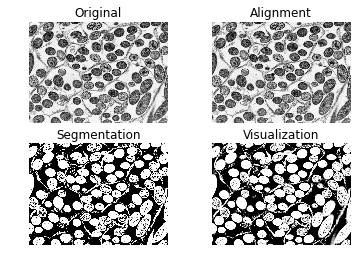

In [37]:
%matplotlib inline
# img = "/Users/DOE6903584/NERSC/tako/examples/data/myxo-small.tif"
# img = mpimg.imread(img)
# plt.imshow(img)

# img = 
# img = mpimg.imread(img)
# plt.imshow(img)
import matplotlib.cm as cm
fig = plt.figure()
a=fig.add_subplot(2,2,1)
a.set_title("Original")
a.axis("off")
# img = mpimg.imread('../_static/stinkbug.png')
# lum_img = img[:,:,0]
# imgplot = plt.imshow(lum_img)
plt.imshow(mpimg.imread("/Users/DOE6903584/NERSC/tako/examples/data/myxo-small.tif"), cmap = cm.Greys_r)

# a.set_title('Before')
# plt.colorbar(ticks=[0.1,0.3,0.5,0.7], orientation ='horizontal')
b=fig.add_subplot(2,2,2)
b.set_title("Alignment")
b.axis("off")
plt.imshow(mpimg.imread(alignment.output), cmap = cm.Greys_r)

c=fig.add_subplot(2,2,3)
c.set_title("Segmentation")
c.axis("off")
plt.imshow(mpimg.imread(segmentation.output), cmap = cm.Greys_r)

d=fig.add_subplot(2,2,4)
d.set_title("Visualization")
d.axis("off")
plt.imshow(mpimg.imread(visualization.output), cmap = cm.Greys_r)
# imgplot = plt.imshow(lum_img)
# imgplot.set_clim(0.0,0.7)
# a.set_title('After')
# plt.colorbar(ticks=[0.1,0.3,0.5,0.7], orientation='horizontal')